# Test high-dimensional covariance models

See: https://en.wikipedia.org/wiki/Gaussian_function



In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [78]:
# Create some data (start with two dimensions)
xgrd = np.arange(0,2,0.05)
ygrd = np.arange(0,1.5,0.05)
XX, YY = np.meshgrid(xgrd, ygrd)
ny,nx = XX.shape

# Assemble (K x N) matrix X
X = np.array([XX.ravel(), YY.ravel()])
# Assemble the matrix C from parameters
lx = 1.
ly = 0.5
lxy = 0.002 # This sets the rotation
C = np.array ([[1/(lx*lx), 1/(lxy*lxy)], [1/(lxy*lxy), 1/(ly*ly)] ])

xpr = 1.
ypr = .3
X0 = np.array([xpr, ypr])[:,None]

Kxx = np.exp(- np.dot( np.dot(X.T,C),X) + np.dot(X0.T,X) )

/home/suntans/miniconda3/envs/sfoda/lib/python3.8/site-packages/matplotlib/text.py:1163: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


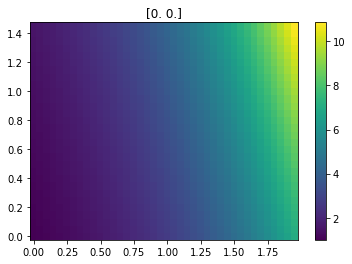

In [79]:
idx = 0
myK = Kxx[idx,:].reshape((ny,nx))
plt.figure()
plt.pcolor(xgrd, ygrd, myK,shading='auto')
plt.title(X[:,idx])
plt.colorbar()

In [181]:
def expquad_cov_2d(X, Y, x, y, params):
    """
    2D Exponential Quadratic Covariance with rotation
    
    Inputs:
        X,Y,T: matrices or vectors of input points
        x,y,t: matrices or vectors of output points
        params: tuple length 4
            eta: scale
            lx: x length scale
            ly: y length scale
            c: translation speed parallel to the rotated y-direction
            thetadeg: rotation angle (degrees CCW of East)
    """
    eta, lx, ly, lxy, xoff, yoff  = params
    
    # Build the covariance matrix
    C = expquad(X,x+xoff,lx) 
    C *= expquad(Y,y+yoff,ly)

    # Rotated component
    C *= 1*expquad2(X,Y,x+xoff,y+yoff,lxy)

    return eta**2 * C

def expquad_cov_3d(X, Y, T, x, y, t, params):
    """
    3D Exponential Quadratic Covariance with rotation
    
    Inputs:
        X,Y,T: matrices or vectors of input points
        x,y,t: matrices or vectors of output points
        params: tuple length 4
            eta: scale
            lx: x length scale
            ly: y length scale
            c: translation speed parallel to the rotated y-direction
            thetadeg: rotation angle (degrees CCW of East)
    """
    eta, lx, ly, lt, lxy, lxt, lyt, xoff, yoff, toff  = params
    
    # Build the covariance matrix
    C = expquad(X,x+xoff,lx) 
    C *= expquad(Y,y+yoff,ly)
    C *= expquad(T,t+toff,lt)

    # Rotated components
    C *= expquad2(X,Y,x+xoff,y+yoff,lxy)
    C *= expquad2(X,T,x+xoff,t+toff,lxt)
    C *= expquad2(Y,T,y+yoff,t+toff,lyt)

    return eta**2 * C


def expquad(x, xpr, l):
    return np.exp(-(x-xpr)*(x-xpr)/(2*l*l))

def expquad2(x, x2, xpr, xpr2, lxy):
    return np.exp(-(x-xpr)*(x2-xpr2)*lxy)

Text(0.5, 1.0, 'lx = 0.4, ly = 0.1, x0 = 1.0, y0 = 0.75')

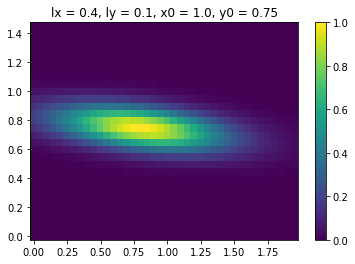

In [190]:
lx = 0.4
ly = 0.1
lxy = 10.0# This sets the rotation
xpr = 1.
ypr = 0.75
xoff = -0.2
yoff = 0.0

Kxx2 = expquad_cov_2d(X[0,:], X[1,:], xpr, ypr, (1, lx, ly, lxy, xoff, yoff))
Kxx2.shape

plt.figure()
plt.pcolor(xgrd, ygrd, Kxx2.reshape((ny,nx)),shading='auto')
plt.colorbar()
plt.title('lx = {}, ly = {}, x0 = {}, y0 = {}'.format(lx,ly,xpr, ypr))